#### Recreate Figure 9 in Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

In [2]:
# specific matplotlib settings from my matplotlibrc file
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (7.5, 8)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 8.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 15.0
plt.rcParams['ytick.major.size'] = 15.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### Handling i/o; reading in values

In [3]:
# data from Kirby et al. 2013
data_K13 = ascii.read('../data/FeAbund_obs_Kirby+13.txt')
stellarMass_K13 = data_K13['stellarMass']
FeAbund_K13 = data_K13['FeAbund']
FeAbund_lowerr_K13 = data_K13['FeAbund_lowerr']
FeAbund_uperr_K13 = data_K13['FeAbund_uperr']

In [4]:
# data for m09 res250 runs with metallicity floor population included
data_floor = ascii.read('../data/metallicity_values_sim-newruns-m09res250-floor_median-weighted.txt')
simID_floor = data_floor['simID']
stellarMass_floor = data_floor['stellarMass']
FeAbund_floor = data_floor['FeAbund_med_W']
metfrac_floor = data_floor['metfrac']
#MgFe_floor = data_floor['MgtoFe']

In [5]:
# data for m09 res250 runs with metallicity floor population excluded
data_nof = ascii.read('../data/metallicity_values_sim-newruns-m09res250-nofloor_median-weighted.txt')
simID_nof = data_nof['simID']
stellarMass_nof = data_nof['stellarMass']
reducedMass_nof = data_nof['reducedMass']
FeAbund_nof = data_nof['FeAbund_med_W']
metfrac_nof = data_nof['metfrac']
#MgFe_nof = data_nof['MgtoFe']

In [6]:
# data for m09 res30 runs with metallicity floor population included
data30_floor = ascii.read('../data/metallicity_values_sim-newruns-m09res30-floor_median-weighted.txt')
simID30_floor = data30_floor['simID']
stellarMass30_floor = data30_floor['stellarMass']
FeAbund30_floor = data30_floor['FeAbund_med_W']
metfrac30_floor = data30_floor['metfrac']
#MgFe30_floor = data30_floor['MgtoFe']

In [7]:
# data for m09 res30 runs with metallicity floor population excluded
data30_nof = ascii.read('../data/metallicity_values_sim-newruns-m09res30-nofloor_median-weighted.txt')
simID30_nof = data30_nof['simID']
stellarMass30_nof = data30_nof['stellarMass']
reducedMass30_nof = data30_nof['reducedMass']
FeAbund30_nof = data30_nof['FeAbund_med_W']
metfrac30_nof = data30_nof['metfrac']
#MgFe30_nof = data30_nof['MgtoFe']

In [8]:
# data point from Wheeler et al. 2019
stellarMass_W19 = 1.2*10**4
FeAbund_W19_floor = -3.87
FeAbund_W19_nof = -3.47

#### Plot 1: MZR for res30 and res250 m09 sims

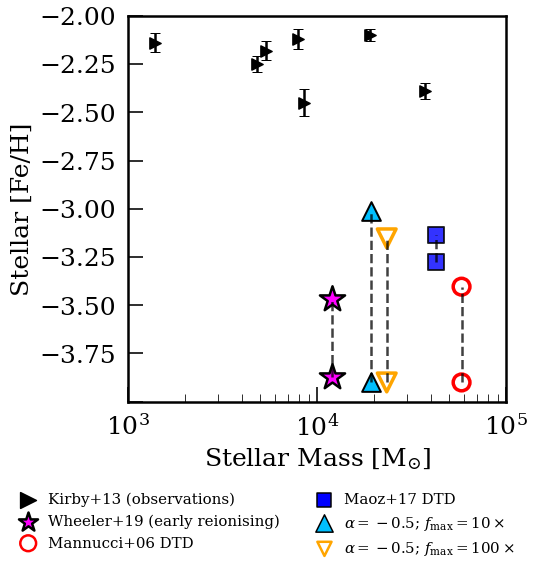

<Figure size 540x576 with 0 Axes>

In [9]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.23, right=0.93, top=0.97, bottom=0.3, wspace=0)

# data points from Kirby et al. 2013
ax.scatter(stellarMass_K13, FeAbund_K13, marker='>', c='k', alpha=1, \
            s=125, edgecolors='black', linewidths=1.5, label=None)
ax.errorbar(stellarMass_K13, FeAbund_K13, yerr=(FeAbund_lowerr_K13,FeAbund_uperr_K13), \
             fmt='none', ecolor='k', alpha=1, capsize=5.0, label=None)

# data points from Wheeler et al. 2019
ax.scatter(stellarMass_W19, FeAbund_W19_floor, marker='*', c='fuchsia', alpha=1, \
           s=700, edgecolors='black', linewidths=2.5, label=None)
ax.scatter(stellarMass_W19, FeAbund_W19_nof, marker='*', c='fuchsia', alpha=1, \
           s=700, edgecolors='black', linewidths=2.5, label=None)

# connecting line between Wheeler et al. 2019 points
ax.plot([stellarMass_W19,stellarMass_W19], [FeAbund_W19_floor,FeAbund_W19_nof], \
        c='k', linewidth=2.5, linestyle='dashed', alpha=0.75)

# note: res250 has unfilled points and res30 has filled points

# m09 250 runs with metallicity floor populations included and original mass
for i in range(0, len(simID_floor)):
    if('Mann' in simID_floor[i]):
        ax.scatter(stellarMass_floor[i], FeAbund_floor[i], facecolors='none', marker='o', \
                   s=280, alpha=1, edgecolors='r', linewidths=3.5, label=None)
    #elif('Maoz' in simID_floor[i]):
    #    ax.scatter(stellarMass_floor[i], FeAbund_floor[i], facecolors='none', marker='s', \
    #               s=90, alpha=0.8, edgecolors='r', linewidths=2.5, label=None)
    elif('Z05_100x' in simID_floor[i]):
        ax.scatter(stellarMass_floor[i], FeAbund_floor[i], facecolors='none', marker='v', \
                   s=350, alpha=1, edgecolors='orange', linewidths=3.5, label=None)
        #print(FeAbund_floor[i])
    #elif('Z05_10x' in simID_floor[i]):
    #    ax.scatter(stellarMass_floor[i], FeAbund_floor[i], facecolors='none', marker='^', \
    #               s=135, alpha=0.8, edgecolors='r', linewidths=2.5, label=None)
        
# m09 250 runs with metallicity floor populations excluded and original mass
for i in range(0, len(simID_nof)):
    if('Mann' in simID_nof[i]):
        ax.scatter(stellarMass_floor[i], FeAbund_nof[i], facecolors='none', marker='o', \
                   s=280, alpha=1, edgecolors='r', linewidths=3.5, label=None)
    #elif('Maoz' in simID_nof[i]):
    #    ax.scatter(stellarMass_floor[i], FeAbund_nof[i], facecolors='none', marker='s', \
    #               s=90, alpha=0.8, edgecolors='orange', linewidths=2.5, label=None)
    elif('Z05_100x' in simID_nof[i]):
        ax.scatter(stellarMass_floor[i], FeAbund_nof[i], facecolors='none', marker='v', \
                   s=350, alpha=1, edgecolors='orange', linewidths=3.5, label=None)
    #elif('Z05_10x' in simID_nof[i]):
    #    ax.scatter(stellarMass_floor[i], FeAbund_nof[i], facecolors='none', marker='^', \
    #               s=135, alpha=0.8, edgecolors='orange', linewidths=2.5, label=None)
    
# connecting lines between res250 points
ax.plot([stellarMass_floor[0],stellarMass_floor[0]], [FeAbund_floor[0],FeAbund_nof[0]], \
         c='k', linewidth=2.5, linestyle='dashed', alpha=0.75)
ax.plot([stellarMass_floor[1],stellarMass_floor[1]], [FeAbund_floor[1],FeAbund_nof[1]], \
         c='k', linewidth=2.5, linestyle='dashed', alpha=0.75)

# m09 30 runs with metallicity floor populations included and original mass
for i in range(0, len(simID30_floor)):
    if('Mann' in simID30_floor[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_floor[i], c='b', marker='o', \
                   s=105, alpha=0.8, edgecolors='k', linewidths=1.5, label=None)
    elif('Maoz' in simID30_floor[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_floor[i], c='b', marker='s', \
                   s=250, alpha=0.8, edgecolors='k', linewidths=2, label=None)
    elif('Z05_100x' in simID30_floor[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_floor[i], c='b', marker='v', \
                   s=135, alpha=0.8, edgecolors='k', linewidths=1.5, label=None)
    elif('Z05_10x' in simID30_floor[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_floor[i], c='deepskyblue', marker='^', \
                   s=350, alpha=1, edgecolors='k', linewidths=2, label=None) 
        
# m09 30 runs with metallicity floor populations excluded and original mass
for i in range(0, len(simID30_nof)):
    if('Mann' in simID30_nof[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_nof[i], c='deepskyblue', marker='o', \
                   s=105, alpha=0.8, edgecolors='k', linewidths=1.5, label=None)
    elif('Maoz' in simID30_nof[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_nof[i], c='b', marker='s', \
                   s=250, alpha=0.8, edgecolors='k', linewidths=2, label=None)
    elif('Z05_100x' in simID30_nof[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_nof[i], c='deepskyblue', marker='v', \
                   s=135, alpha=0.8, edgecolors='k', linewidths=1.5, label=None)
    elif('Z05_10x' in simID30_nof[i]):
        ax.scatter(stellarMass30_floor[i], FeAbund30_nof[i], c='deepskyblue', marker='^', \
                   s=350, alpha=1, edgecolors='k', linewidths=2, label=None)

# connecting lines between res30 points
ax.plot([stellarMass30_floor[0],stellarMass30_floor[0]], [FeAbund30_floor[0],FeAbund30_nof[0]], \
         c='k', linewidth=2.5, linestyle='dashed', alpha=0.75)
ax.plot([stellarMass30_floor[1],stellarMass30_floor[1]], [FeAbund30_floor[1],FeAbund30_nof[1]], \
         c='k', linewidth=2.5, linestyle='dashed', alpha=0.75)

# dummy points for legend
ax.scatter(1, 1, marker='>', c='k', alpha=1, 
           s=250, edgecolors='black', linewidths=1.5, 
           label='Kirby+13 (observations)')
ax.scatter(1, 1, marker='*', c='fuchsia', alpha=1, 
           s=400, edgecolors='black', linewidths=2.5, 
           label='Wheeler+19 (early reionising)')
ax.scatter(1, 5, facecolors='none', marker='o', s=250, alpha=1, edgecolors='r', 
           linewidths=2.5, label='Mannucci+06 DTD')
ax.scatter(1, 5, c='b', marker='s', s=200, alpha=1, edgecolors='k', 
           linewidths=1.5, label='Maoz+17 DTD')
ax.scatter(1, 5, c='deepskyblue', marker='^', s=300, alpha=1, edgecolors='k', 
           linewidths=1.5, label='$\\alpha=-0.5$; $f_{\\rm max}=10\\times$')
ax.scatter(1, 5, facecolors='none', marker='v', s=200, alpha=1, edgecolors='orange', 
           linewidths=2.5, label='$\\alpha=-0.5$; $f_{\\rm max}=100\\times$')

# specifying rest of the plot
ax.legend(prop={'size':15}, loc='upper left', ncol=2, \
             bbox_to_anchor=(-0.34, -0.2), fancybox=True)
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Stellar [Fe/H]")
ax.set_xlim(10**3, 10**5)
ax.set_ylim(-4, -2.05)
ax.set_xscale('log')
ax.set_yticks([-4.00,-3.75,-3.50,-3.25,-3.00,-2.75,-2.50,-2.25,-2.00])
yticks = ax.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()